## Fashion MNIST Data Set - Convolutional Neural Network

The data set being used is Fashion MNIST which is a dataset of Zalando's article images. https://www.kaggle.com/datasets/zalando-research/fashionmnist . 

Parts of model implementation borrowed or inspired from Pavan Sanagapati's implementation of CNN with Tensorflow https://www.kaggle.com/code/pavansanagapati/a-simple-cnn-model-beginner-guide. Will be mentioned when this takes place.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


# Reading files and Exploring Data

In [2]:
train_df = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
test_df = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df["label"]

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [6]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
label_counts = train_df["label"].value_counts()
for i in range(len(label_counts)):
    label = class_names[label_counts.index[i]]
    count = label_counts.values[i]
    print("{}:{}".format(label,count))

Pullover:6000
Ankle boot:6000
Shirt:6000
T_shirt/top:6000
Dress:6000
Coat:6000
Sandal:6000
Bag:6000
Sneaker:6000
Trouser:6000


In [7]:
label_counts_test = test_df["label"].value_counts()
for i in range(len(label_counts_test)):
    label = class_names[label_counts_test.index[i]]
    count = label_counts_test.values[i]
    print("{}:{}".format(label,count))

T_shirt/top:1000
Trouser:1000
Pullover:1000
Dress:1000
Bag:1000
Shirt:1000
Sandal:1000
Coat:1000
Sneaker:1000
Ankle boot:1000


In [8]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')
len(train_data)

60000

Idea to split data and scale it in the following manner inspired from Pavan Sanagapati's model

In [9]:
x_train = train_data[:,1:]/255 #Feature Scaling
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]


In [10]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train,test_size = 0.2, random_state = 2023)

In [11]:
num_rows = 28
num_cols = 28

Reshaping the array's that were created before into shape (28,28,1) 

In [12]:
x_train = x_train.reshape(x_train.shape[0],num_rows,num_cols,1)
x_test = x_test.reshape(x_test.shape[0],num_rows,num_cols,1)
x_cv = x_cv.reshape(x_cv.shape[0],num_rows,num_cols,1)

# Convolutional Neural Network Model
Using a sequential neural network, a convolutional layer with 32 filters and a kernel size of (3,3), ie. a filter of size 3, using an activation function of ReLU is followed by using maxpooling to change shapes into (2,2). Repeated again with 64 filters before being flattened and processed through a dense ReLU layer and the final output layer being softmax

In [13]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(num_rows,num_cols,1)),
    MaxPooling2D((2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])

2022-12-31 20:29:05.256221: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                3

In [15]:
trained_model = model.fit(x_train,
                         y_train,
                         batch_size=128,
                         epochs=50,
                         
                         validation_data=(x_cv,y_cv))

2022-12-31 20:29:05.629706: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
375/375 [==============================] - 17s 42ms/step - loss: 0.6922 - accuracy: 0.7439 - val_loss: 0.4555 - val_accuracy: 0.8283
Epoch 2/50
375/375 [==============================] - 15s 40ms/step - loss: 0.4115 - accuracy: 0.8534 - val_loss: 0.3574 - val_accuracy: 0.8718
Epoch 3/50
375/375 [==============================] - 16s 42ms/step - loss: 0.3484 - accuracy: 0.8752 - val_loss: 0.3449 - val_accuracy: 0.8762
Epoch 4/50
375/375 [==============================] - 15s 39ms/step - loss: 0.3141 - accuracy: 0.8864 - val_loss: 0.3161 - val_accuracy: 0.8867
Epoch 5/50
375/375 [==============================] - 16s 41ms/step - loss: 0.2865 - accuracy: 0.8965 - val_loss: 0.3060 - val_accuracy: 0.8867
Epoch 6/50
375/375 [==============================] - 15s 39ms/step - loss: 0.2665 - accuracy: 0.9041 - val_loss: 0.2758 - val_accuracy: 0.8991
Epoch 7/50
375/375 [==============================] - 15s 41ms/step - loss: 0.2492 - accuracy: 0.9101 - val_loss: 0.2637 - val_accuracy:

Text(0.5, 1.0, 'Training- Accuaracy')

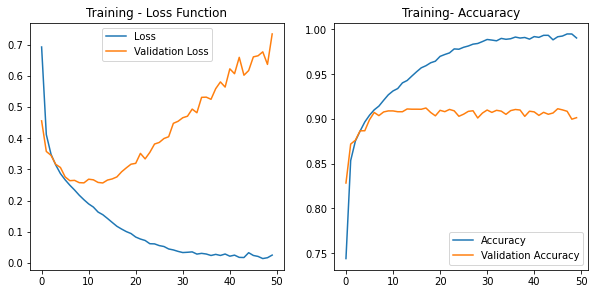

In [16]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(trained_model.history['loss'], label='Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(trained_model.history['accuracy'], label='Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training- Accuaracy')



As can be seen, validation loss is increasing while validation accuracy is constant. Overfitting is likely occuring

Overfitting can be alleviated through using dropout layers

Use of dropout layer's inspired from Pavan Sanagapati's model

In [17]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(num_rows,num_cols,1)),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.5),
    Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    Dropout(0.25),
    Flatten(),
    Dropout(0.4),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

In [19]:
trained_model = model.fit(x_train,
                         y_train,
                         batch_size=128,
                         epochs=50,
                         
                         validation_data=(x_cv,y_cv))

Epoch 1/50
375/375 [==============================] - 19s 50ms/step - loss: 0.8373 - accuracy: 0.6872 - val_loss: 0.5057 - val_accuracy: 0.8124
Epoch 2/50
375/375 [==============================] - 18s 49ms/step - loss: 0.5288 - accuracy: 0.8035 - val_loss: 0.4174 - val_accuracy: 0.8458
Epoch 3/50
375/375 [==============================] - 19s 50ms/step - loss: 0.4688 - accuracy: 0.8265 - val_loss: 0.3623 - val_accuracy: 0.8665
Epoch 4/50
375/375 [==============================] - 18s 48ms/step - loss: 0.4289 - accuracy: 0.8421 - val_loss: 0.3398 - val_accuracy: 0.8748
Epoch 5/50
375/375 [==============================] - 19s 49ms/step - loss: 0.4018 - accuracy: 0.8526 - val_loss: 0.3313 - val_accuracy: 0.8742
Epoch 6/50
375/375 [==============================] - 19s 51ms/step - loss: 0.3858 - accuracy: 0.8595 - val_loss: 0.3015 - val_accuracy: 0.8878
Epoch 7/50
375/375 [==============================] - 18s 49ms/step - loss: 0.3688 - accuracy: 0.8660 - val_loss: 0.3003 - val_accuracy:

Text(0.5, 1.0, 'Training- Accuaracy')

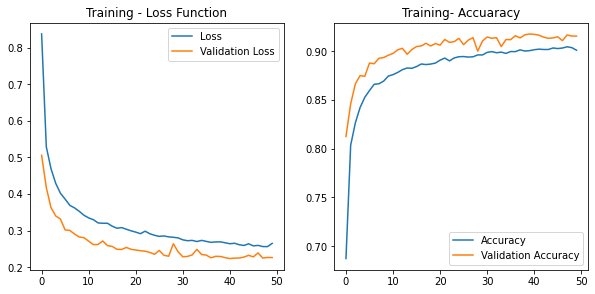

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(trained_model.history['loss'], label='Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(trained_model.history['accuracy'], label='Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training- Accuaracy')

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21740680932998657
Test accuracy: 0.9204000234603882


In [22]:
predicted = model.predict_classes(x_test)
p = predicted[:10000]
y_true = test_df.iloc[:,0]
y = y_true[:10000]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted, target_names=target_names))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

     Class 0       0.87      0.87      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.90      0.85      0.88      1000
     Class 3       0.93      0.94      0.93      1000
     Class 4       0.86      0.90      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.77      0.75      0.76      1000
     Class 7       0.93      0.98      0.96      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

